In [30]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import random
import math
import librosa

In [4]:
# path to json
data_path = "/work/data_10.json"

In [13]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # converting the lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    return  X, y

In [14]:
# load data
X, y = load_data(data_path)

In [15]:
X.shape

(5996, 130, 13)

In [16]:
y

array([0, 0, 0, ..., 5, 5, 5])

In [17]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Training models

### ANN model

In [ ]:
# build network topology
ann_model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])
     

In [ ]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
ann_model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
ann = ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)
     

Epoch 1/100
141/141 [==============================] - 3s 17ms/step - loss: 28.3204 - accuracy: 0.1879 - val_loss: 4.1016 - val_accuracy: 0.2962
Epoch 2/100
141/141 [==============================] - 2s 16ms/step - loss: 9.9745 - accuracy: 0.2270 - val_loss: 3.3171 - val_accuracy: 0.2915
Epoch 3/100
141/141 [==============================] - 2s 16ms/step - loss: 6.4508 - accuracy: 0.2255 - val_loss: 3.3296 - val_accuracy: 0.2622
Epoch 4/100
141/141 [==============================] - 2s 15ms/step - loss: 5.0635 - accuracy: 0.2177 - val_loss: 3.3136 - val_accuracy: 0.2675
Epoch 5/100
141/141 [==============================] - 2s 16ms/step - loss: 4.3570 - accuracy: 0.2186 - val_loss: 3.3326 - val_accuracy: 0.2715
Epoch 6/100
141/141 [==============================] - 2s 16ms/step - loss: 3.9783 - accuracy: 0.2319 - val_loss: 3.3364 - val_accuracy: 0.2702
Epoch 7/100
141/141 [==============================] - 2s 16ms/step - loss: 3.7096 - accuracy: 0.2346 - val_loss: 3.3356 - val_accuracy

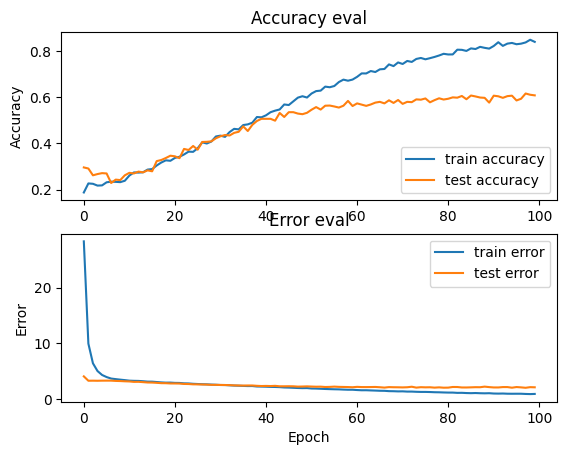

In [ ]:
# plot accuracy and error as a function of the epochs
fig, axs = plt.subplots(2)

axs[0].plot(ann.history["accuracy"], label="train accuracy")
axs[0].plot(ann.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

    # create error sublpot
axs[1].plot(ann.history["loss"], label="train error")
axs[1].plot(ann.history["val_loss"], label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.show()

### CNN Model

In [ ]:

# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [ ]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))
     


In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
     

In [ ]:
cnn_model = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)


Epoch 1/50
113/113 [==============================] - 12s 101ms/step - loss: 2.4505 - accuracy: 0.2205 - val_loss: 1.9451 - val_accuracy: 0.3011
Epoch 2/50
113/113 [==============================] - 11s 98ms/step - loss: 1.8598 - accuracy: 0.3600 - val_loss: 1.6011 - val_accuracy: 0.4122
Epoch 3/50
113/113 [==============================] - 11s 99ms/step - loss: 1.6538 - accuracy: 0.4192 - val_loss: 1.4392 - val_accuracy: 0.4644
Epoch 4/50
113/113 [==============================] - 11s 98ms/step - loss: 1.5205 - accuracy: 0.4584 - val_loss: 1.3350 - val_accuracy: 0.4922
Epoch 5/50
113/113 [==============================] - 11s 99ms/step - loss: 1.4204 - accuracy: 0.4910 - val_loss: 1.2930 - val_accuracy: 0.5100
Epoch 6/50
113/113 [==============================] - 11s 99ms/step - loss: 1.3690 - accuracy: 0.4951 - val_loss: 1.2461 - val_accuracy: 0.5256
Epoch 7/50
113/113 [==============================] - 11s 99ms/step - loss: 1.3007 - accuracy: 0.5240 - val_loss: 1.2009 - val_accuracy

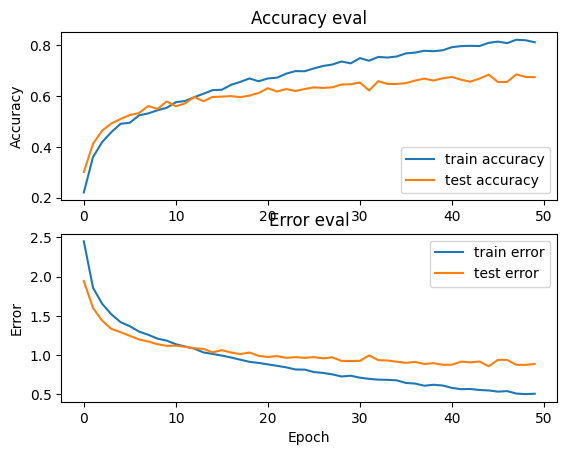

In [ ]:
fig, axs = plt.subplots(2)

axs[0].plot(cnn_model.history["accuracy"], label="train accuracy")
axs[0].plot(cnn_model.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

    # create error sublpot
axs[1].plot(cnn_model.history["loss"], label="train error")
axs[1].plot(cnn_model.history["val_loss"], label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.show()

In [ ]:
cnn_loss, cnn_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
ann_loss, ann_acc = ann_model.evaluate(X_test, y_test, verbose=2)
print('\n CNN test accuracy:', cnn_acc,
'\n ANN test accuracy: ', ann_acc)

47/47 - 1s - loss: 0.9483 - accuracy: 0.6484 - 943ms/epoch - 20ms/step
47/47 - 0s - loss: 1.0704 - accuracy: 0.8439 - 209ms/epoch - 4ms/step

 CNN test accuracy: 0.6484323143959045 
 ANN test accuracy:  0.8438959121704102


In [ ]:
pickle.dump(model_cnn, open('cnn_model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://5b0e45a1-ad28-4f64-af52-069da4da09f3/assets
INFO:tensorflow:Assets written to: ram://5b0e45a1-ad28-4f64-af52-069da4da09f3/assets


In [43]:
import gzip
with gzip.open('ann_model.pkl', 'wb') as ofp:
    pickle.dump(ann_model, ofp)

INFO:tensorflow:Assets written to: ram://a1bffc80-5641-4fd2-a18e-cc8e59ee868b/assets


In [45]:
pickle.dump(ann_model, open('ann_model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://c35e2683-c641-4deb-a5dc-e3267039b8c9/assets


I have chosen to use the ANN model but saved both models just in case.

In [ ]:
ann_model.save("Music_Genre_ANN")

INFO:tensorflow:Assets written to: Music_Genre_ANN/assets
INFO:tensorflow:Assets written to: Music_Genre_ANN/assets


### Predicting

In [18]:
ann_model = pickle.load(open('ann_model.pkl', 'rb'))
#pickled_model.predict(X_test)

In [19]:
X_to_predict = X_test[100]
y_to_predict = y_test[100]


In [20]:
X_to_predict.shape

(130, 13)

In [21]:
y_test

array([4, 0, 3, ..., 5, 3, 0])

In [22]:
genre_dict = {0:'hiphop', 1:'rock', 2:'mpop', 3:'folk', 4:'pop', 5:'indie'}

In [41]:
# pick a sample to predict from the test set
X_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", genre_dict[y_to_predict])

def predict(X_predict):
    X_to_predict = X_predict[np.newaxis, ...]

    predict_prob=ann_model.predict(X_to_predict)
    predict_classes=np.argmax(predict_prob, axis=1)
    # get index with max value
    predicted_index = (predict_classes)

    
    pred_percen = round((predict_prob.max() * 100), 2)

    #print("Predicted Genre:", genre_dict[int(predicted_index)] , predict_prob.max())

    print("Predicted Genre:", genre_dict[int(predicted_index)] , pred_percen," %")

Real Genre: folk


In [42]:
predict(X_predict)

1/1 [==============================] - 0s 17ms/step
Predicted Genre: folk 21.58  %


In [27]:
def process_input(audio_file):
    sample_rate = 22050
    num_mfcc = 13
    n_ftt=2048
    hop_len=512
    track_dur = 30 # measured in seconds
    samples_per_track = sample_rate * track_dur
    num_seg = 10
    samples_per_segment = int(samples_per_track / num_seg)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_len)

    signal, sample_rate = librosa.load(audio_file, sr=sample_rate)
    for d in range(10):
        # calculate start and finish sample for current segment
        start = samples_per_segment * d
        finish = start + samples_per_segment

        # extract mfcc
        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_ftt, hop_length=hop_len)
        mfcc = mfcc.T

    return mfcc

In [34]:
new_input = process_input("/work/ahuna.mp3")

In [35]:
predict(X_predict=new_input)

1/1 [==============================] - 0s 20ms/step
Predicted Genre: hiphop 0.998126


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b07dafd9-52d0-496f-b99d-0bc116229374' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>